In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [22]:
df=pd.read_csv(r'C:\Users\Pranshu Chaurasia\OneDrive\Desktop\Projects\EDA\Vehicle Insurance business\AnalyticsOlympiad2022Data\train.csv')

In [23]:
df.head()

ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0  816393  40-64  female             20-29y   university   middle class   
1  251762  26-39    male             20-29y  high school   middle class   
2  481952  40-64    male             20-29y         none   middle class   
3    3506  40-64    male             20-29y  high school    upper class   
4  498013  40-64  female             20-29y         none  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0      0.638050                0.0   after 2015      0.0       0.0   
1      0.475741                1.0  before 2015      1.0       0.0   
2      0.839817                1.0  before 2015      1.0       1.0   
3      0.682527                1.0  before 2015      0.0       1.0   
4      0.572184                1.0   after 2015      1.0       1.0   

   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0        37379         11000.0                    0     0               0   
1        10238          9000.0                    0     0               0   
2        10238         12000.0                    0     0               0   
3        92099          6000.0                    1     0               0   
4        32122         15000.0                    0     0               1   

   OUTCOME TYPE_OF_VEHICLE  
0      0.0      Sports Car  
1      1.0       HatchBack  
2      1.0           Sedan  
3      1.0           Sedan  
4      0.0           Sedan

In [24]:
df.shape

(105000, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [26]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [27]:
df1=df

In [28]:
df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

In [29]:
df.nunique()[0]

98485

In [30]:
df.describe()

ID   CREDIT_SCORE  VEHICLE_OWNERSHIP        MARRIED  \
count  105000.000000  105000.000000      105000.000000  105000.000000   
mean   394931.295905       0.602173           0.827038       0.584143   
std    279694.106053       0.138045           0.378216       0.492871   
min       101.000000       0.066880           0.000000       0.000000   
25%    156351.750000       0.514876           1.000000       0.000000   
50%    354679.500000       0.601112           1.000000       1.000000   
75%    598602.250000       0.703216           1.000000       1.000000   
max    999976.000000       0.954075           1.000000       1.000000   

            CHILDREN    POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
count  105000.000000  105000.000000   105000.000000        105000.000000   
mean        0.520000   18045.439267    11061.228571             0.675676   
std         0.499602   16709.040449     2972.355482             1.383678   
min         0.000000   10238.000000     2000.000000             0.000000   
25%         0.000000   10238.000000     9000.000000             0.000000   
50%         1.000000   10238.000000    11000.000000             0.000000   
75%         1.000000   22957.750000    13000.000000             1.000000   
max         1.000000   92101.000000    21000.000000            20.000000   

                DUIS  PAST_ACCIDENTS        OUTCOME  
count  105000.000000   105000.000000  105000.000000  
mean        0.129733        0.549314       0.422648  
std         0.589714        1.402809       0.493983  
min         0.000000        0.000000       0.000000  
25%         0.000000        0.000000       0.000000  
50%         0.000000        0.000000       0.000000  
75%         0.000000        0.000000       1.000000  
max         6.000000       15.000000       1.000000

In [31]:
df.describe().T

count           mean            std          min  \
ID                   105000.0  394931.295905  279694.106053    101.00000   
CREDIT_SCORE         105000.0       0.602173       0.138045      0.06688   
VEHICLE_OWNERSHIP    105000.0       0.827038       0.378216      0.00000   
MARRIED              105000.0       0.584143       0.492871      0.00000   
CHILDREN             105000.0       0.520000       0.499602      0.00000   
POSTAL_CODE          105000.0   18045.439267   16709.040449  10238.00000   
ANNUAL_MILEAGE       105000.0   11061.228571    2972.355482   2000.00000   
SPEEDING_VIOLATIONS  105000.0       0.675676       1.383678      0.00000   
DUIS                 105000.0       0.129733       0.589714      0.00000   
PAST_ACCIDENTS       105000.0       0.549314       1.402809      0.00000   
OUTCOME              105000.0       0.422648       0.493983      0.00000   

                               25%            50%            75%  \
ID                   156351.750000  354679.500000  598602.250000   
CREDIT_SCORE              0.514876       0.601112       0.703216   
VEHICLE_OWNERSHIP         1.000000       1.000000       1.000000   
MARRIED                   0.000000       1.000000       1.000000   
CHILDREN                  0.000000       1.000000       1.000000   
POSTAL_CODE           10238.000000   10238.000000   22957.750000   
ANNUAL_MILEAGE         9000.000000   11000.000000   13000.000000   
SPEEDING_VIOLATIONS       0.000000       0.000000       1.000000   
DUIS                      0.000000       0.000000       0.000000   
PAST_ACCIDENTS            0.000000       0.000000       0.000000   
OUTCOME                   0.000000       0.000000       1.000000   

                               max  
ID                   999976.000000  
CREDIT_SCORE              0.954075  
VEHICLE_OWNERSHIP         1.000000  
MARRIED                   1.000000  
CHILDREN                  1.000000  
POSTAL_CODE           92101.000000  
ANNUAL_MILEAGE        21000.000000  
SPEEDING_VIOLATIONS      20.000000  
DUIS                      6.000000  
PAST_ACCIDENTS           15.000000  
OUTCOME                   1.000000

In [32]:
for i in df1.columns:
    if(df1[i].dtype=='O'):
        df1= df1.drop(i,axis=1)

In [33]:
df1.corr()

ID  CREDIT_SCORE  VEHICLE_OWNERSHIP   MARRIED  \
ID                   1.000000      0.005688          -0.012405 -0.017966   
CREDIT_SCORE         0.005688      1.000000           0.004609 -0.000021   
VEHICLE_OWNERSHIP   -0.012405      0.004609           1.000000 -0.005129   
MARRIED             -0.017966     -0.000021          -0.005129  1.000000   
CHILDREN            -0.005864     -0.000055           0.005581 -0.002290   
POSTAL_CODE          0.006400     -0.005986          -0.001231  0.003795   
ANNUAL_MILEAGE      -0.009844     -0.020313           0.004668  0.001206   
SPEEDING_VIOLATIONS -0.008415     -0.008752          -0.004623  0.004530   
DUIS                 0.001580      0.004746           0.002950  0.001992   
PAST_ACCIDENTS       0.008127     -0.006167           0.001474  0.005259   
OUTCOME             -0.002383     -0.003068          -0.003074 -0.006028   

                     CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE  \
ID                  -0.005864     0.006400       -0.009844   
CREDIT_SCORE        -0.000055    -0.005986       -0.020313   
VEHICLE_OWNERSHIP    0.005581    -0.001231        0.004668   
MARRIED             -0.002290     0.003795        0.001206   
CHILDREN             1.000000    -0.005244        0.005477   
POSTAL_CODE         -0.005244     1.000000        0.007323   
ANNUAL_MILEAGE       0.005477     0.007323        1.000000   
SPEEDING_VIOLATIONS  0.001048     0.007690       -0.003679   
DUIS                 0.002184     0.007836        0.003803   
PAST_ACCIDENTS      -0.005538     0.009485       -0.004355   
OUTCOME              0.001869    -0.002801       -0.001104   

                     SPEEDING_VIOLATIONS      DUIS  PAST_ACCIDENTS   OUTCOME  
ID                             -0.008415  0.001580        0.008127 -0.002383  
CREDIT_SCORE                   -0.008752  0.004746       -0.006167 -0.003068  
VEHICLE_OWNERSHIP              -0.004623  0.002950        0.001474 -0.003074  
MARRIED                         0.004530  0.001992        0.005259 -0.006028  
CHILDREN                        0.001048  0.002184       -0.005538  0.001869  
POSTAL_CODE                     0.007690  0.007836        0.009485 -0.002801  
ANNUAL_MILEAGE                 -0.003679  0.003803       -0.004355 -0.001104  
SPEEDING_VIOLATIONS             1.000000  0.005753        0.005374  0.000151  
DUIS                            0.005753  1.000000        0.003929  0.000382  
PAST_ACCIDENTS                  0.005374  0.003929        1.000000 -0.002343  
OUTCOME                         0.000151  0.000382       -0.002343  1.000000

<AxesSubplot:>

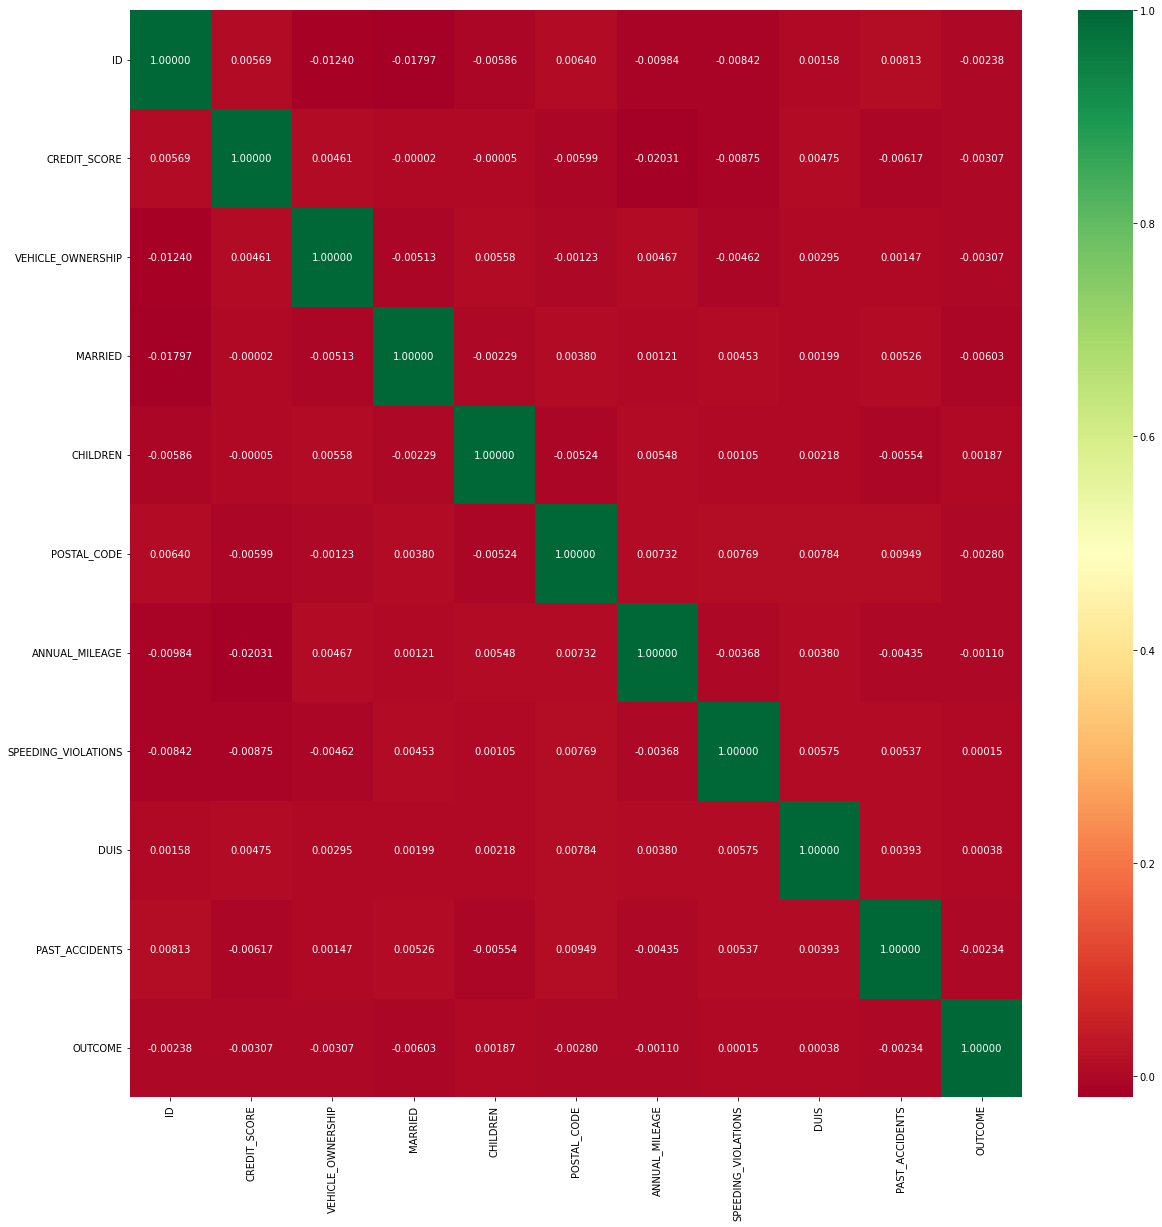

In [34]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(), annot=True, fmt='.5f', cmap='RdYlGn')

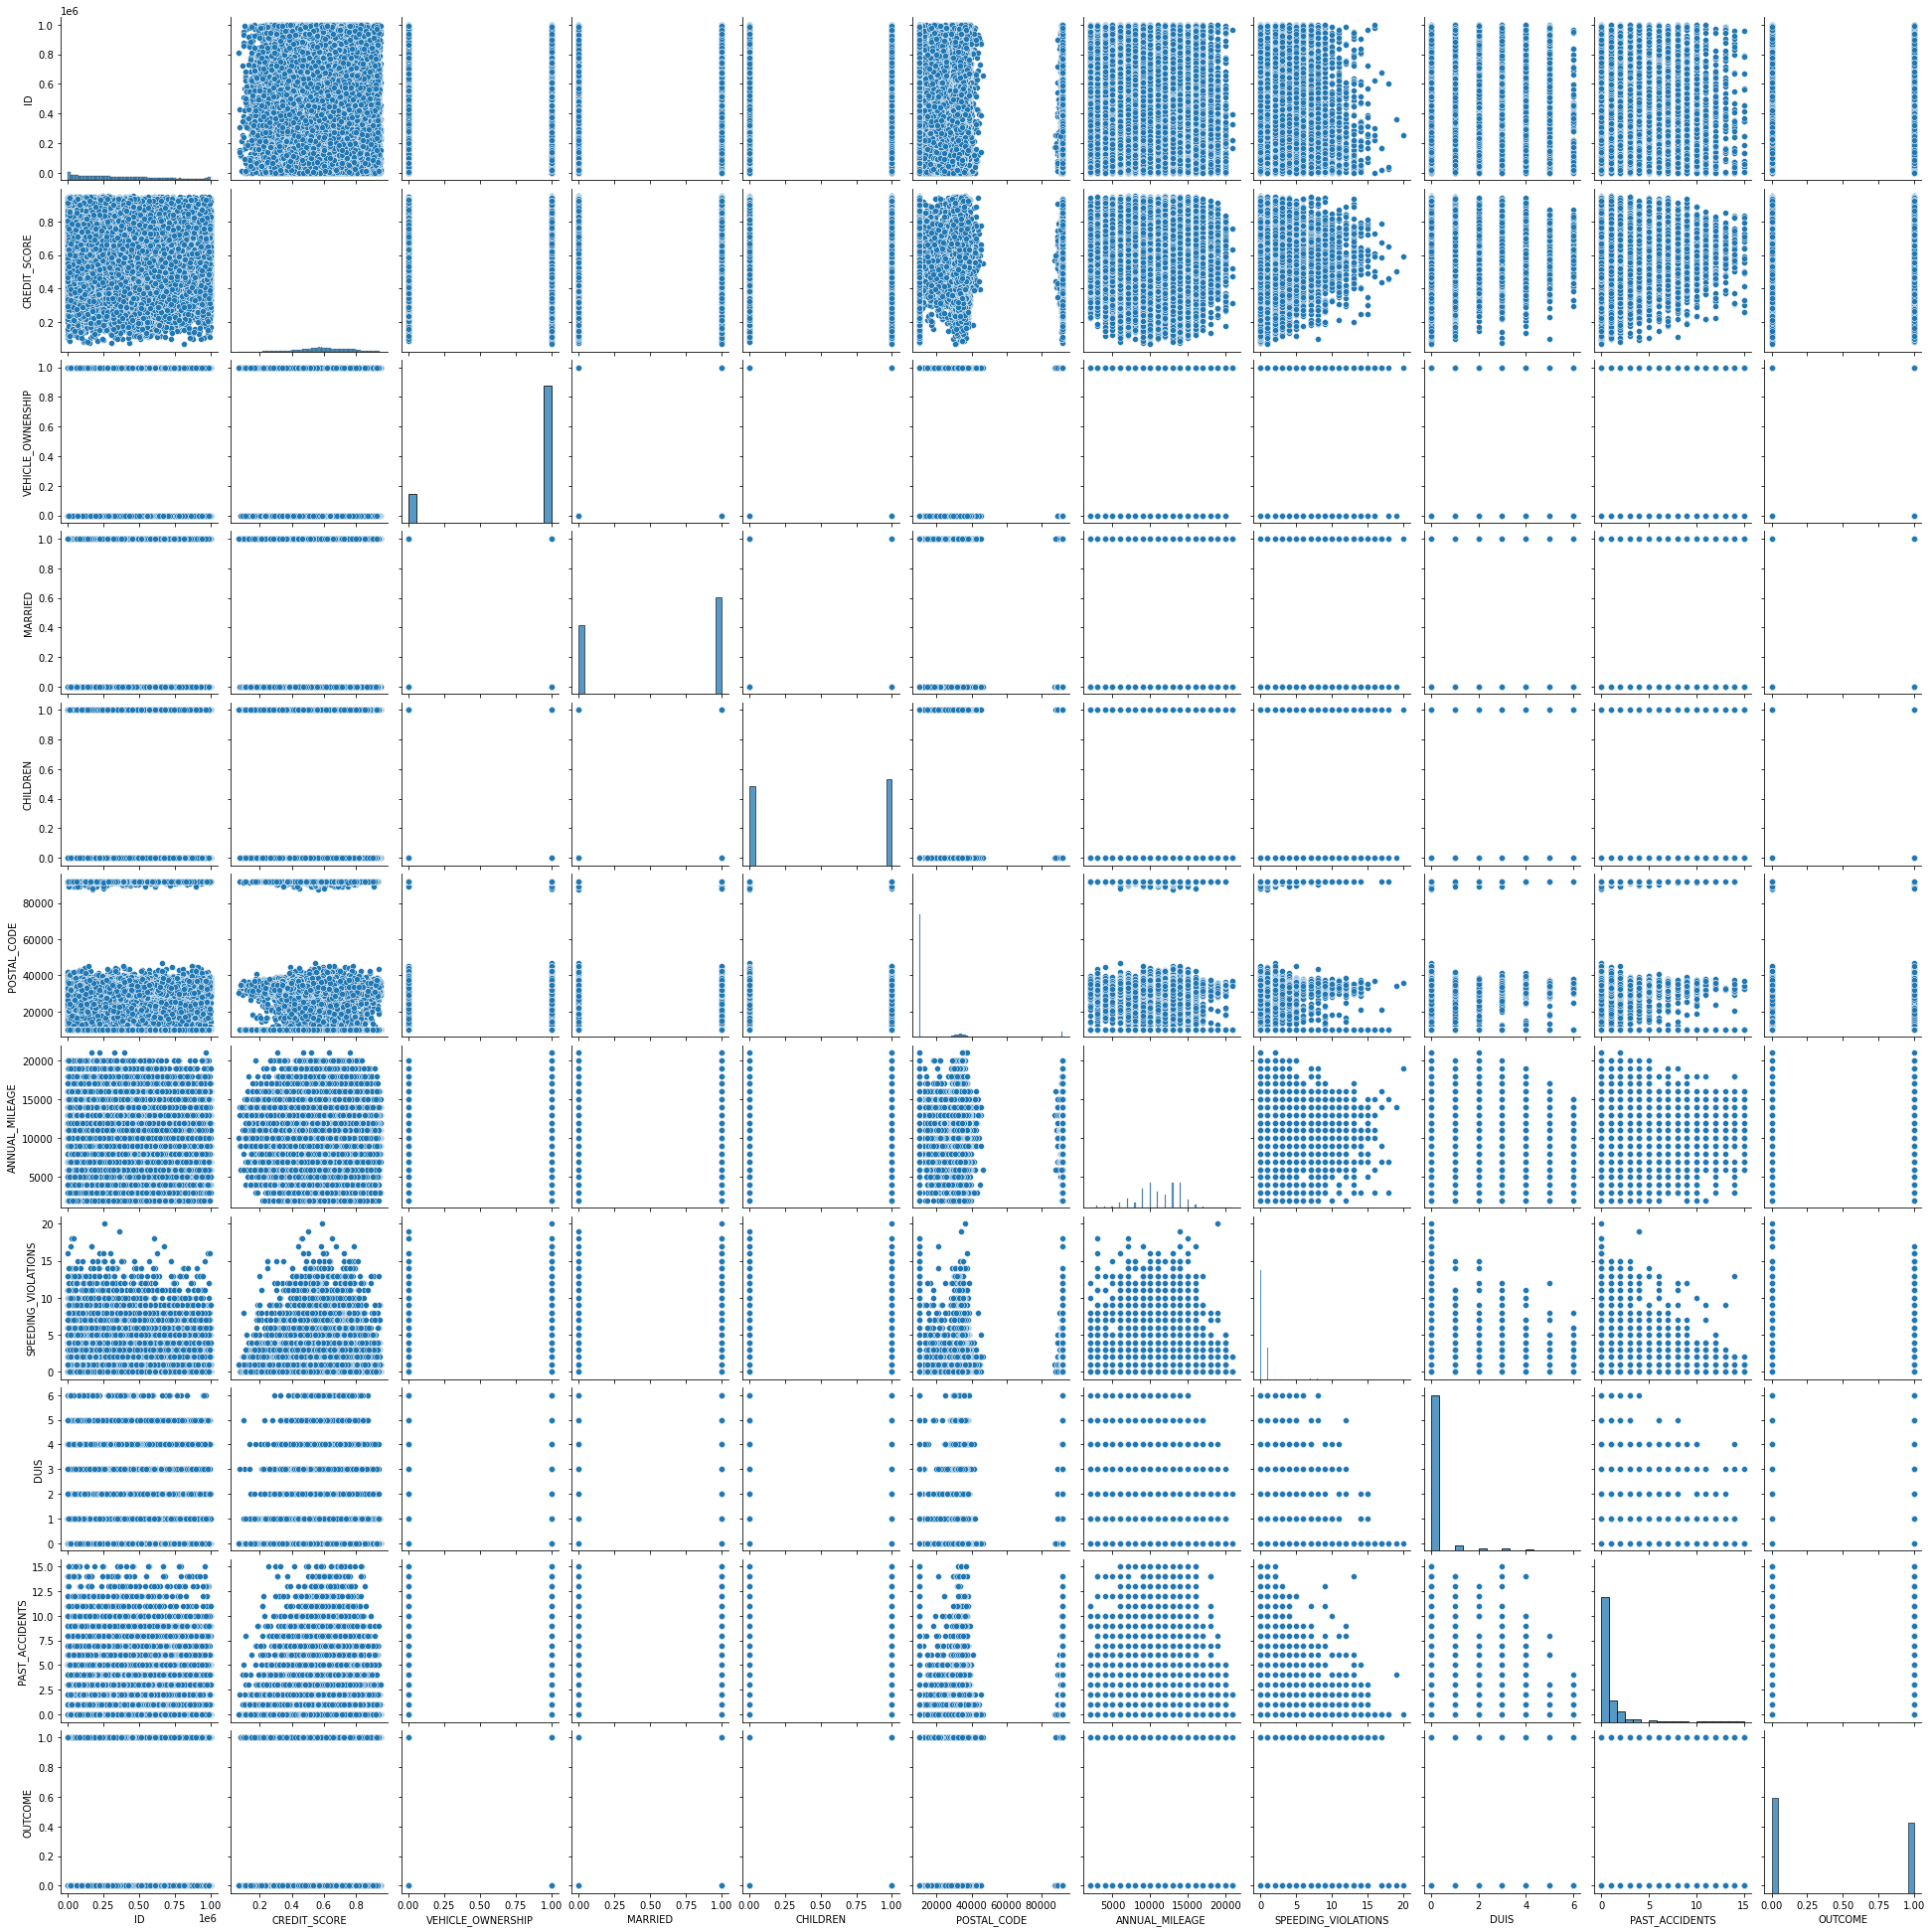

In [35]:
sns.pairplot(df, palette='hls')

In [36]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
r2 = df.corr(method="kendall")
r3 = df.corr(method="pearson")
r4 = df.corr(method="spearman")

C:\Users\Pranshu Chaurasia\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

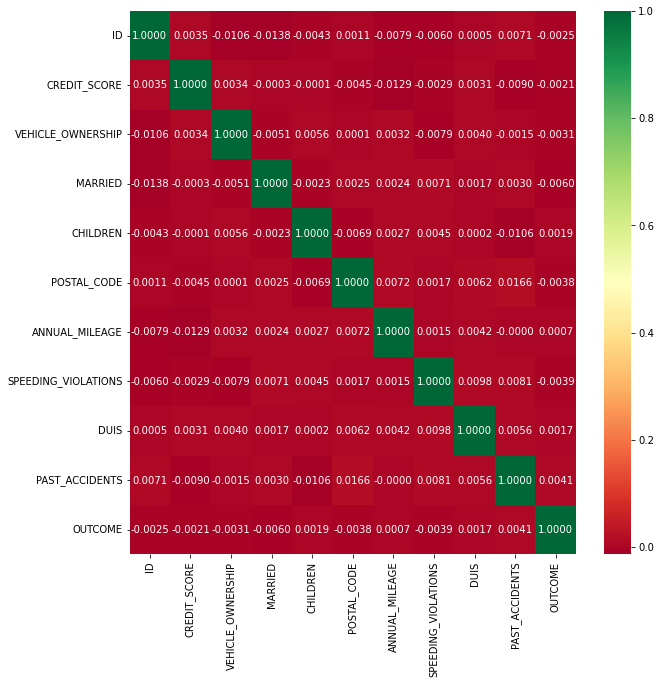

In [43]:
plt.figure(figsize = (10,10))
sns.heatmap(r2, annot=True, fmt='.4f', cmap='RdYlGn')

<AxesSubplot:>

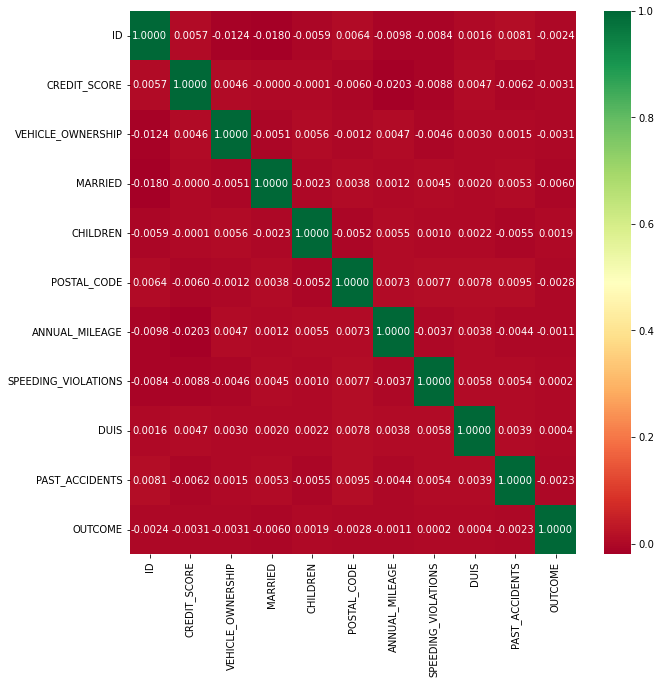

In [44]:
plt.figure(figsize = (10,10))
sns.heatmap(r3, annot=True, fmt='.4f', cmap='RdYlGn')

<AxesSubplot:>

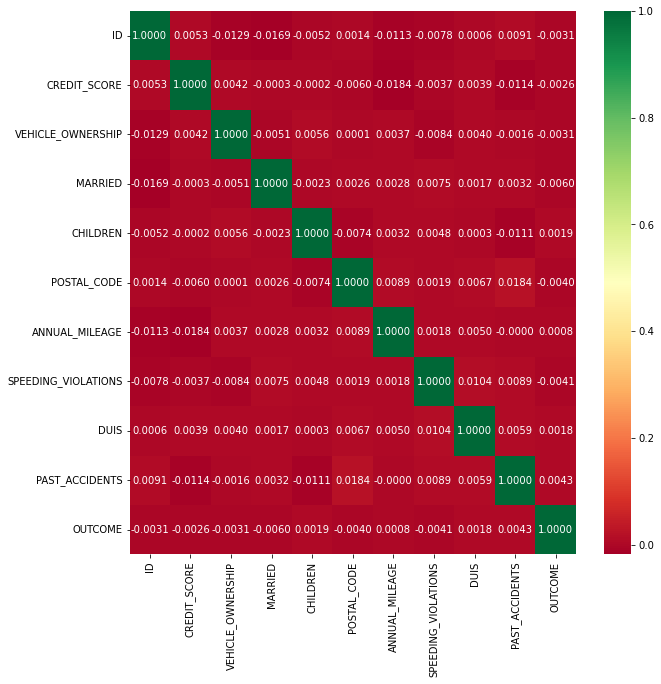

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap(r4, annot=True, fmt='.4f', cmap='RdYlGn')